In [3]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,PowerTransformer ,StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer

In [4]:
df = pd.read_csv('loan-dataset.csv',usecols=['dependents','employed','income','spouse_income','loan_amount','monthly_installment','credit_history','loan_approval'])
df['spouse_income'] = df['spouse_income'].str.replace('.','',regex=False)

In [5]:
df = df.astype({'spouse_income': np.int64})


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dependents           599 non-null    object 
 1   employed             582 non-null    object 
 2   income               614 non-null    int64  
 3   spouse_income        614 non-null    int64  
 4   loan_amount          592 non-null    float64
 5   monthly_installment  600 non-null    float64
 6   credit_history       564 non-null    float64
 7   loan_approval        614 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 38.5+ KB


In [6]:
condtion = df['spouse_income'] < 50000
df['spouse_income'] = df['spouse_income'].where(condtion , other=40000)

In [7]:
df.describe()

,income,spouse_income,loan_amount,monthly_installment,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1749.907166,146.412162,342.00000,0.842199
std,6109.041673,3653.372064,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1221.000000,128.000000,360.00000,1.000000
75%,5795.000000,2324.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df

,dependents,employed,income,spouse_income,loan_amount,monthly_installment,credit_history,loan_approval
0,0,No,5849,0,NaN,360.0,1.0,Y
1,1,No,4583,1508,128.0,360.0,1.0,N
2,0,Yes,3000,0,66.0,360.0,1.0,Y
3,0,No,2583,2358,120.0,360.0,1.0,Y
4,0,No,6000,0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...
609,0,No,2900,0,71.0,360.0,1.0,Y
610,3+,No,4106,0,40.0,180.0,1.0,Y
611,1,No,8072,240,253.0,360.0,1.0,Y
612,2,No,7583,0,187.0,360.0,1.0,Y


In [9]:
x = df.drop('loan_approval',axis=1)
y =  df['loan_approval']

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,dependents,employed,income,spouse_income,loan_amount,monthly_installment,credit_history
83,0,No,6000,2250,265.0,360.0,NaN
90,0,No,2958,2900,131.0,360.0,1.0
227,2,No,6250,1695,210.0,360.0,1.0
482,0,No,2083,3150,128.0,360.0,1.0
464,0,No,4166,0,98.0,360.0,0.0
...,...,...,...,...,...,...,...
71,2,Yes,1875,1875,97.0,360.0,1.0
106,2,No,11417,1126,225.0,360.0,1.0
270,0,No,3237,0,30.0,360.0,1.0
435,NaN,No,10047,0,NaN,240.0,1.0


In [ ]:
# x_train = x_train[['spouse_income','income','loan_amount','monthly_installment']]
# x_test = x_test[['spouse_income','income','loan_amount','monthly_installment']]
# x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 83 to 102
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   spouse_income        491 non-null    int64  
 1   income               491 non-null    int64  
 2   loan_amount          475 non-null    float64
 3   monthly_installment  479 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 19.2 KB


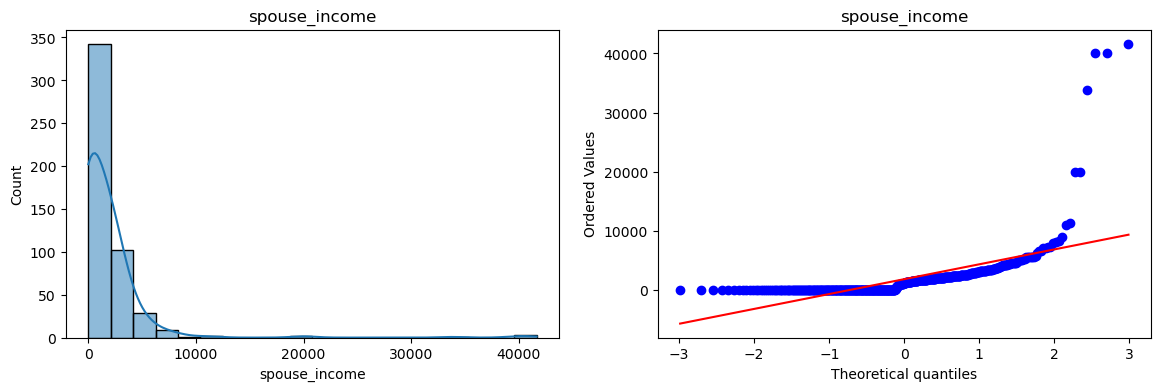

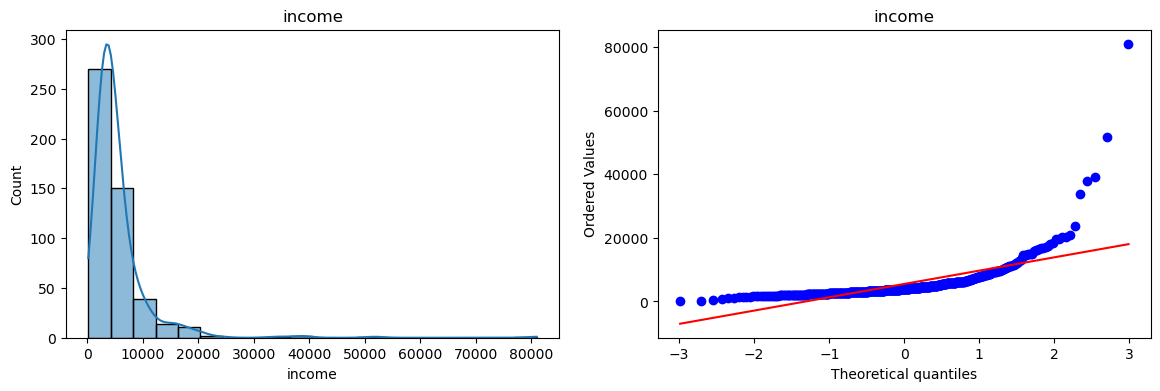

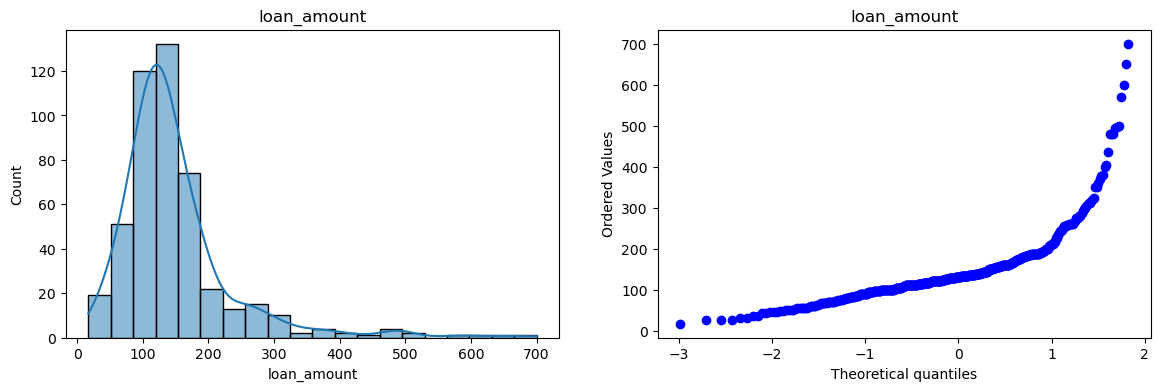

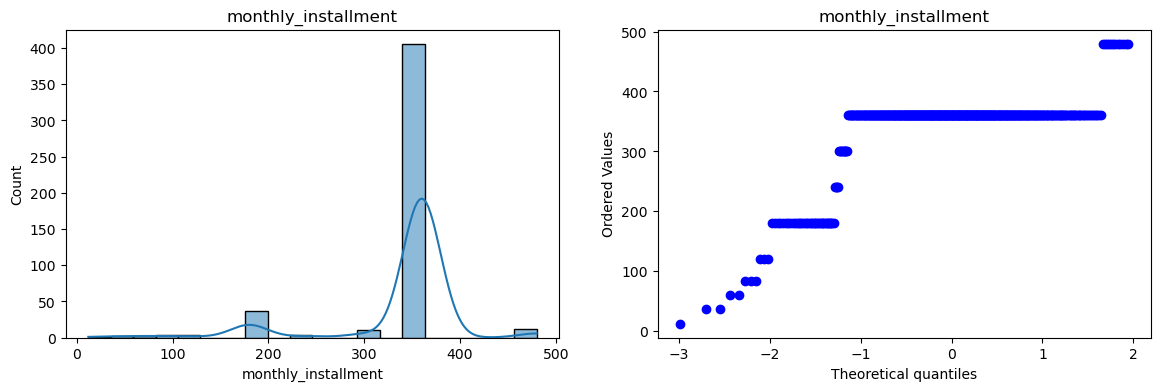

In [23]:
for cols in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[cols],kde=True,bins=20)
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(x_train[cols], dist="norm", plot=plt)
    plt.title(cols)

    plt.show()

In [24]:
# df['monthly_installment'] = df['monthly_installment'].fillna(df['monthly_installment'].mean())
# # nd_data['monthly_installment'] = nd_data['monthly_installment'].fillna(nd_data['monthly_installment'].mean())
# df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].mean())
# nd_data.info()


In [25]:
# y_train

In [26]:
# target column change catgorical data into numarical data 
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [27]:
# target column change catgorical data into numarical data 
# le = LabelEncoder()
# y_test = le.fit_transform(y_test)

In [28]:
# y_train.shape

In [33]:
# m = LogisticRegression()

# m.fit(x_train,y_train)
# y_pred = m.predict(x_test)
# accuracy_score(y_test,y_pred)
x_train

,dependents,employed,income,spouse_income,loan_amount,monthly_installment,credit_history
83,0,No,6000,2250,265.0,360.0,NaN
90,0,No,2958,2900,131.0,360.0,1.0
227,2,No,6250,1695,210.0,360.0,1.0
482,0,No,2083,3150,128.0,360.0,1.0
464,0,No,4166,0,98.0,360.0,0.0
...,...,...,...,...,...,...,...
71,2,Yes,1875,1875,97.0,360.0,1.0
106,2,No,11417,1126,225.0,360.0,1.0
270,0,No,3237,0,30.0,360.0,1.0
435,NaN,No,10047,0,NaN,240.0,1.0


In [11]:
cat_data = [
            'dependents' #0,1,2,+3
            ]
bin_cols = [ # Yes/No
    'employed'
    ]

numarical_data = [
    'income',
    'spouse_income',
    'loan_amount',
    'monthly_installment'
    ]
card_data = [
    'credit_history' #0/1
]

In [ ]:
# cleaning 
cat_pipe =Pipeline([
    ('missing_data',SimpleImputer(strategy='most_frequent')),
    ('Oh_Encoding',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'))
])

In [13]:
#  binirization on employed data 
bin_pipe = Pipeline([
    ('missing_data',SimpleImputer(strategy='most_frequent')),
    ('oh_Encoding',OneHotEncoder(sparse_output=False,drop='if_binary',handle_unknown='ignore'))
])

In [14]:
num_pipe = Pipeline([
    ('missing_data',SimpleImputer(strategy='mean')),
    ('normald_data',PowerTransformer()),
    ('scaling',StandardScaler())
])

In [15]:
card_pipe = Pipeline([
    ('clean_missing',SimpleImputer(strategy='most_frequent'))
])

In [ ]:
preprocess = ColumnTransformer(transformers=[
    ("cat_pipe",cat_pipe, cat_data),
    ('bin_pipe',bin_pipe,bin_cols),
    ('num_pipe',num_pipe,numarical_data),
    ('card_pipe',card_pipe, card_data)
])

# feature_names = pipe['preprocess'].get_feature_names_out()
# print(feature_names)

['cat_pipe__dependents_1' 'cat_pipe__dependents_2'
 'cat_pipe__dependents_3+' 'bin_pipe__employed_Yes' 'num_pipe__income'
 'num_pipe__spouse_income' 'num_pipe__loan_amount'
 'num_pipe__monthly_installment' 'card_pipe__credit_history']


In [31]:
pipe = Pipeline([
    ('preprocess',preprocess),
    ('model',LogisticRegression())
]
)


In [33]:
pipe.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_pipe', ...), ('bin_pipe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
y_pred = pipe.predict(x_test) 

In [21]:
accuracy_score(y_test,y_pred)

0.7886178861788617